In [1]:
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [4]:
X = data.iloc[:,[2,4]].values

In [5]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

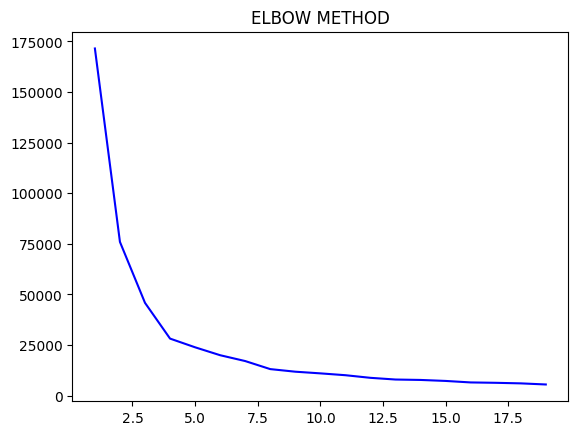

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = range(1,20), y =elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state =101)
y_pred = kmeans.fit_predict(X)

C:\Users\HP\AppData\Local\Temp\ipykernel_10068\1608907011.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


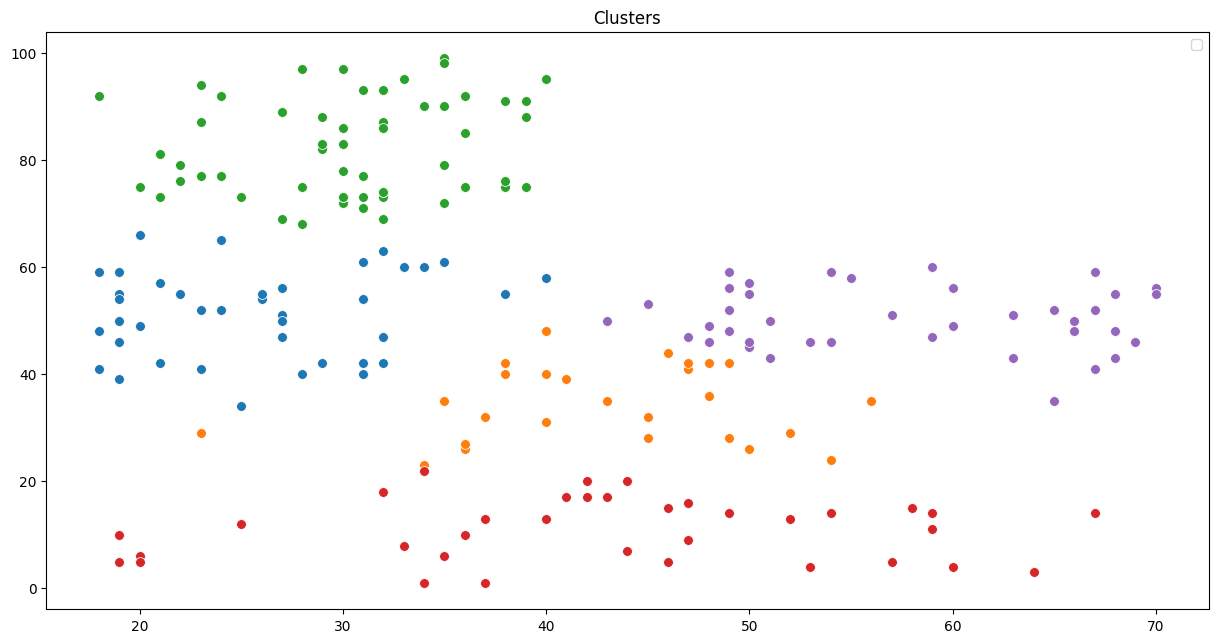

In [13]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(x=X[y_pred == 0, 0],y= X[y_pred == 0, 1],s=50)
sns.scatterplot(x=X[y_pred == 1, 0],y= X[y_pred == 1, 1],s=50)
sns.scatterplot(x=X[y_pred == 2, 0],y= X[y_pred == 2, 1],s=50)
sns.scatterplot(x=X[y_pred == 3, 0],y= X[y_pred == 3, 1],s=50)
sns.scatterplot(x=X[y_pred == 4, 0],y= X[y_pred == 4, 1],s=50)
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(x=X[y_pred == 0, 0],y= X[y_pred == 0, 1],s=50)
sns.scatterplot(x=X[y_pred == 1, 0],y= X[y_pred == 1, 1],s=50)
sns.scatterplot(x=X[y_pred == 2, 0],y= X[y_pred == 2, 1],s=50)
sns.scatterplot(x=X[y_pred == 3, 0],y= X[y_pred == 3, 1],s=50)
sns.scatterplot(x=X[y_pred == 4, 0],y= X[y_pred == 4, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()